In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [ ]:
#sklearn.metrics
from sklearn import tree #дерево решений tree.DecisionTreeRegressor() или
#tree.DecisionTreeClassifier()
from sklearn import ensemble #случайный лес ensemble.RandomForestRegressor()
#или ensemble.RandomForestClassifier()
#стекинг ensemble.StackingRegressor() или
#ensemble.StackingClassifier()
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree # для отрисовки дерева
#Готовые реализации бустингов
import xgboost as xg
import catboost as cb
import lightgbm as lgb

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kgulina","key":"5102d54b697e7f079d383df9de226950"}'}

In [ ]:
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download 'shivam2503/diamonds'

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 99.2MB/s]


In [ ]:
!unzip diamonds.zip

Archive:  diamonds.zip
  inflating: diamonds.csv            


In [ ]:
data = pd.read_csv("diamonds.csv")
print(data.shape)
data.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

3


['cut', 'color', 'clarity']

In [ ]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

7


['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
target_name = 'price'
numeric_cols.remove('price')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [ ]:
X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

In [ ]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = encoder.fit_transform(X_train[categorical_cols]).astype(int)
X_test_cat = encoder.fit_transform(X_test[categorical_cols]).astype(int)

In [ ]:
X_train = np.hstack((X_train_num, X_train_cat))
X_test = np.hstack((X_test_num, X_test_cat))
X_train.shape, X_test.shape

((37758, 9), (16182, 9))

#Дерево решений

In [ ]:
tree_regressor = tree.DecisionTreeRegressor()
param_grid_tr = {
    'max_depth': [10, 15, 50, None],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ["best", "random"]
}

In [ ]:
grid_search_tr = GridSearchCV(
    estimator = tree_regressor,
    param_grid = param_grid_tr,
    cv = 10,
    scoring = 'r2'
)

grid_search_tr.fit(X_train[:3000], y_train[:3000])

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 15, 50, None],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [ ]:
grid_search_tr.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=10)

In [ ]:
pred_tr = grid_search_tr.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, pred_tr)
r2 = r2_score(y_test, pred_tr)
mae = mean_absolute_error(y_test, pred_tr)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 467.74578074504853
MSE = 880162.016; R2 = 0.9426


[Text(0.5, 0.9, 'x[0] <= 0.865\npoisson = 1689.078\nsamples = 3000\nvalue = 3935.425'),
 Text(0.25, 0.7, 'x[4] <= 4.995\npoisson = 256.579\nsamples = 1788\nvalue = 1435.935'),
 Text(0.125, 0.5, 'x[3] <= 4.635\npoisson = 33.839\nsamples = 973\nvalue = 782.808'),
 Text(0.0625, 0.3, 'x[3] <= 4.255\npoisson = 24.364\nsamples = 676\nvalue = 700.892'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'x[8] <= 5.5\npoisson = 24.665\nsamples = 297\nvalue = 969.256'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'x[4] <= 5.575\npoisson = 128.45\nsamples = 815\nvalue = 2215.68'),
 Text(0.3125, 0.3, 'x[8] <= 5.5\npoisson = 55.31\nsamples = 432\nvalue = 1706.484'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'x[7] <= 4.5\npoisson = 70.49\nsamples = 383\nvalue = 2790.021'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1, '\n  (...)  \n'),
 Text(

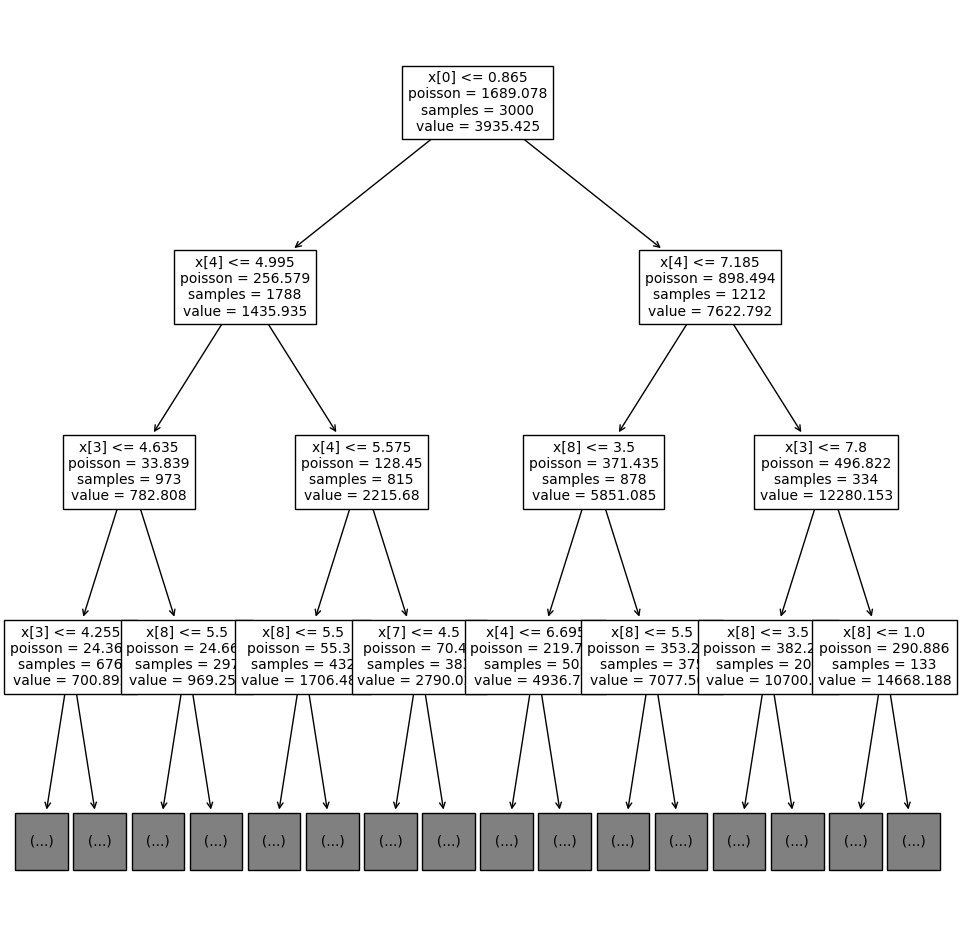

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(grid_search_tr.best_estimator_, max_depth=3, fontsize=10)

#Стекинг

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()
ridge = Ridge(random_state=1)

estimators = [('ridge', Ridge()),
              ('lasso', Lasso(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

final_estimator = ensemble.GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = ensemble.StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)


#stack_regressor.fit(X_train[:3000], y_train[:3000])
reg.fit(X_train[:3000], y_train[:3000])

StackingRegressor(estimators=[('ridge', Ridge()),
                              ('lasso', Lasso(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

In [ ]:
pred_stack = reg.predict(X_test)

mse = mean_squared_error(y_test, pred_stack)
r2 = r2_score(y_test, pred_stack)
mae = mean_absolute_error(y_test, pred_stack)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 646.0467922110124
MSE = 1213511.019; R2 = 0.9209


#Бэггинг

In [ ]:
rf = ensemble.RandomForestRegressor(n_estimators=10)
rf.fit(X_train[:3000], y_train[:3000])

RandomForestRegressor(n_estimators=10)

In [ ]:
pred_tr = rf.predict(X_test)

mse = mean_squared_error(y_test, pred_tr)
r2 = r2_score(y_test, pred_tr)
mae = mean_absolute_error(y_test, pred_tr)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 390.51141391669756
MSE = 607951.58; R2 = 0.9604


#Бустинг

## xgboost

In [ ]:
xgb_regressor = xg.XGBRegressor(eval_metric='rmsle')

param_grid_xgb = {"max_depth": [4, 5, 6],
              "n_estimators": [700, 800, 900],
              "learning_rate": [0.01, 0.015]}

grid_search_xgb = GridSearchCV(xgb_regressor, param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train[:3000], y_train[:3000])

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.015], 'max_depth': [4, 5, 6],
                         'n_estimators': [700, 800, 900]})

In [ ]:
grid_search_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

mse = mean_squared_error(y_test, pred_xgb)
r2 = r2_score(y_test, pred_xgb)
mae = mean_absolute_error(y_test, pred_xgb)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 335.0957394898004
MSE = 420764.983; R2 = 0.9726
